In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sns.set(rc={'figure.figsize':(6,4)})

In [ ]:
df_airbnb=pd.read_csv('/content/drive/MyDrive/airbnb.csv')
df_airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df_airbnb[['name','host_name']] = df_airbnb[['name','host_name']].fillna('Unknown')
df_airbnb = df_airbnb[df_airbnb['price'] != 0]
df_airbnb[['last_review','reviews_per_month']] = df_airbnb[['last_review','reviews_per_month']].fillna('0')

In [ ]:
df_airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df_airbnb["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df_airbnb["neighbourhood_group"].value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Class Frequencies of Neighbourhood Variable')

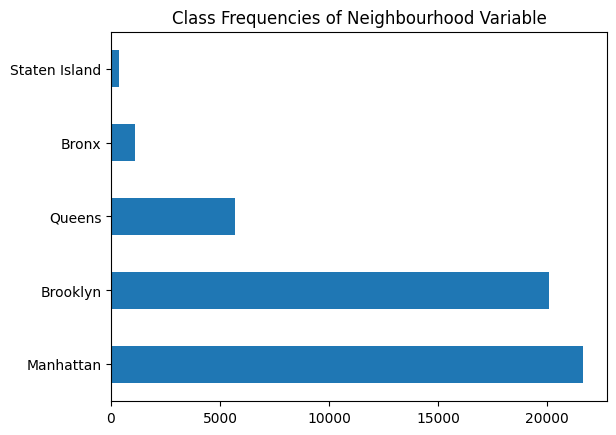

In [ ]:
df_airbnb["neighbourhood_group"].value_counts().plot.barh().set_title("Class Frequencies of Neighbourhood Variable")

<ipython-input-17-a9054a9049ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_airbnb.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5)).set_title("Graphic of Neighbourhood Group")


Text(0.5, 1.0, 'Graphic of Neighbourhood Group')

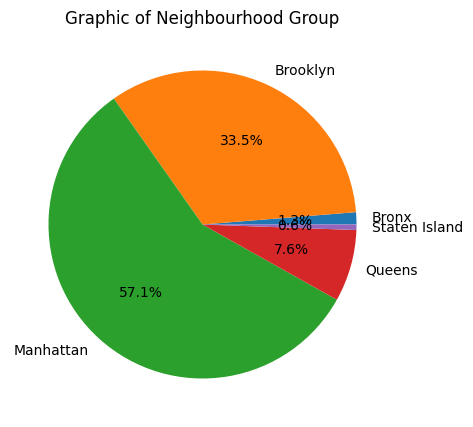

In [ ]:
df_airbnb.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5)).set_title("Graphic of Neighbourhood Group")

In [ ]:
df_airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df_airbnb["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Class Frequencies of Room Type Variable')

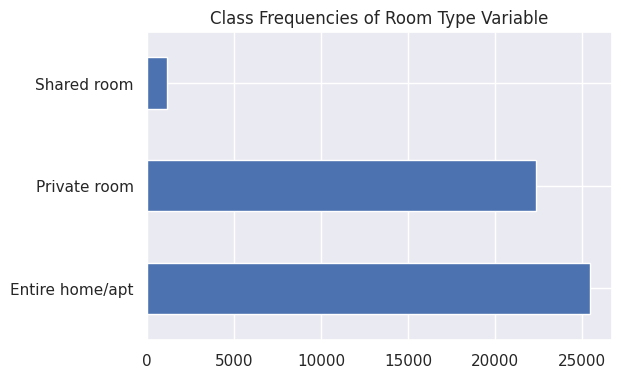

In [ ]:
df_airbnb["room_type"].value_counts().plot.barh().set_title("Class Frequencies of Room Type Variable")

<ipython-input-18-6b531e0e4183>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_airbnb.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5)).set_title("Graphic of Room Type")


Text(0.5, 1.0, 'Graphic of Room Type')

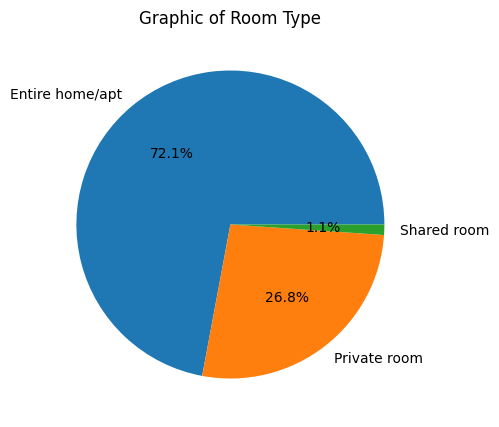

In [ ]:
df_airbnb.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5)).set_title("Graphic of Room Type")

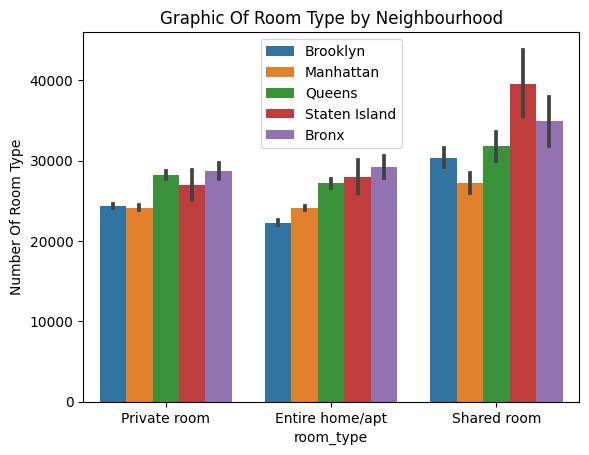

In [ ]:
sns.barplot(df_airbnb,x=df_airbnb['room_type'],y=df_airbnb.index,hue="neighbourhood_group").set_title("Graphic Of Room Type by Neighbourhood")
plt.ylabel("Number Of Room Type")
plt.legend(loc='upper center')

In [ ]:
df_airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

Text(0.5, 1.0, 'Prices Of Neighbourhood Group')

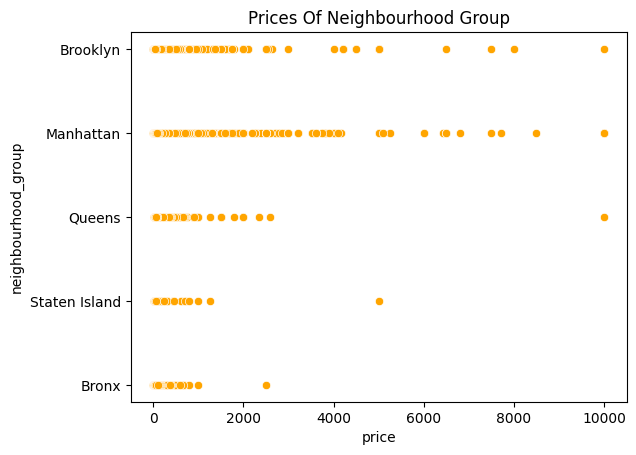

In [ ]:
sns.scatterplot(data=df_airbnb,y='neighbourhood_group',x="price", color="orange")
plt.title('Prices Of Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood - Price')

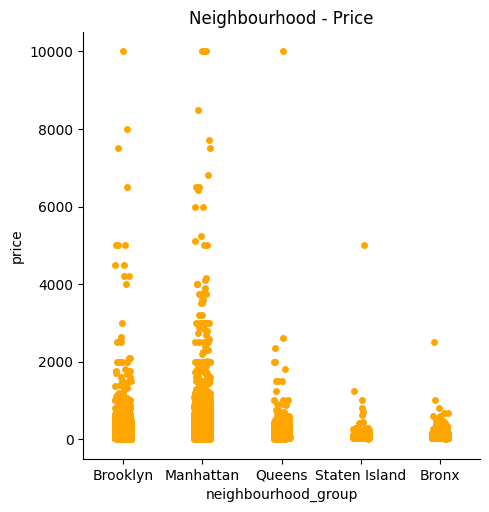

In [ ]:
sns.catplot(x="neighbourhood_group", y="price", data=df_airbnb, color="orange")
plt.title("Neighbourhood - Price")

Text(0.5, 1.0, 'Prices Of Room Type')

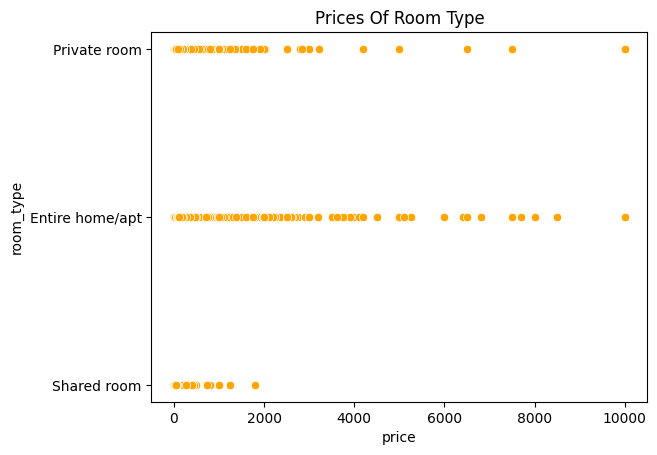

In [ ]:
sns.scatterplot(data=df_airbnb,y='room_type',x="price", color="orange")
plt.title('Prices Of Room Type')

Text(0.5, 1.0, 'Room Type - Price')

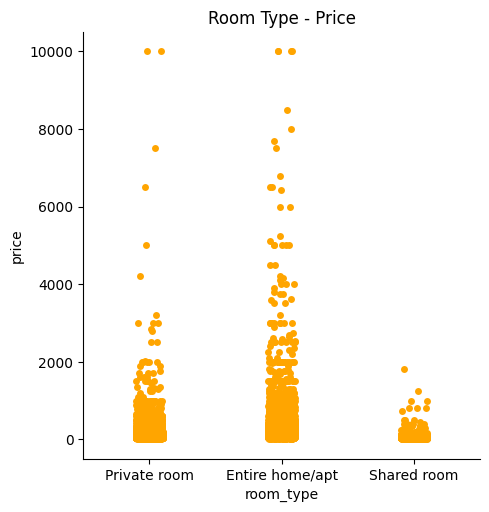

In [ ]:
sns.catplot(x="room_type", y="price", data=df_airbnb, color="orange")
plt.title("Room Type - Price")

(0.0, 2500.0, 0.0, 3000.0)

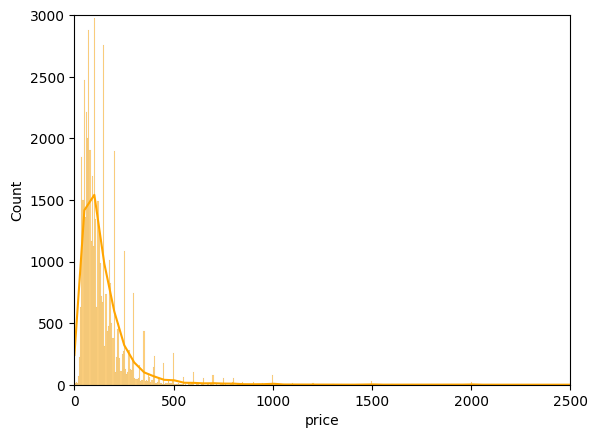

In [ ]:

sns.histplot(df_airbnb,x="price",kde=True, color="orange")
plt.axis([0,2500,0,3000])

(0.0, 2000.0, 0.0, 0.006)

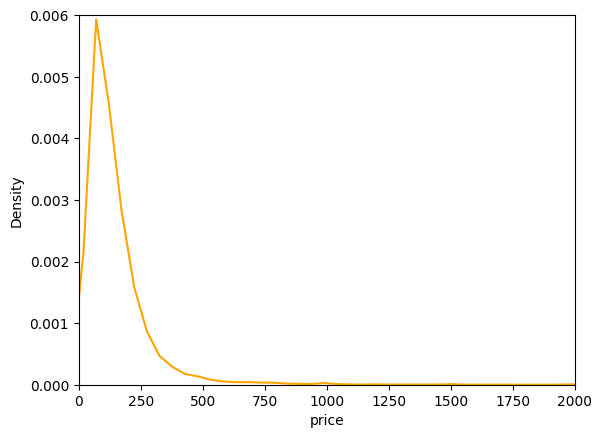

In [ ]:
sns.kdeplot(df_airbnb["price"], color="orange")
plt.axis([0,2000,0,0.006])

Text(0.5, 1.0, 'Room Type - Price')

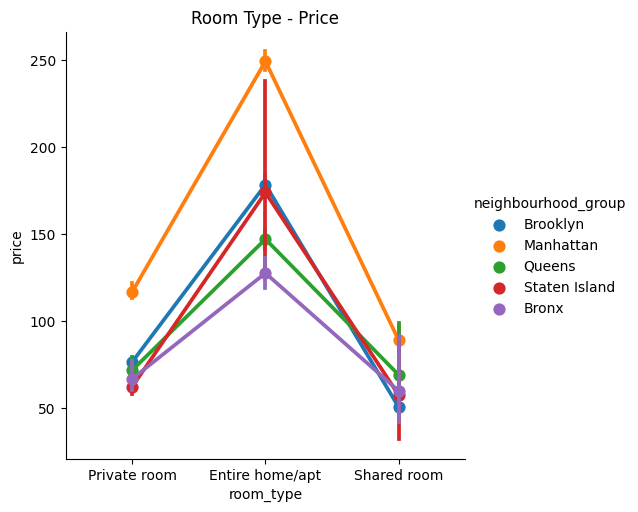

In [ ]:
sns.catplot(x="room_type", y="price", hue="neighbourhood_group", kind="point", data=df_airbnb)
plt.title("Room Type - Price")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


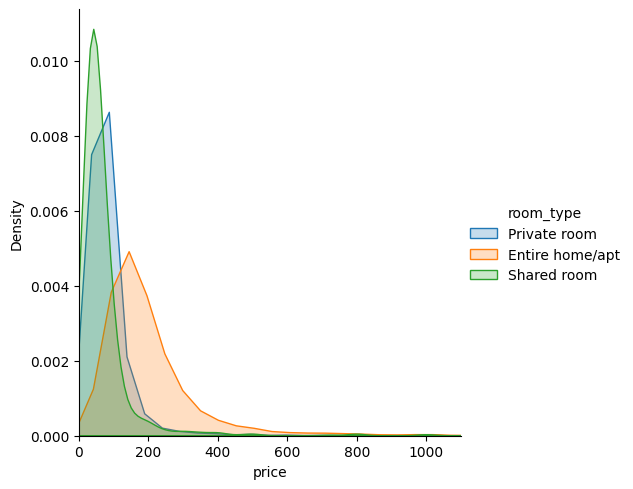

In [ ]:
(sns.FacetGrid(df_airbnb, hue="room_type", height=5, xlim=(0, 1100)).map(sns.kdeplot, "price", shade=True).add_legend())

<ipython-input-32-0a9cb15a3b37>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_columns.corr()


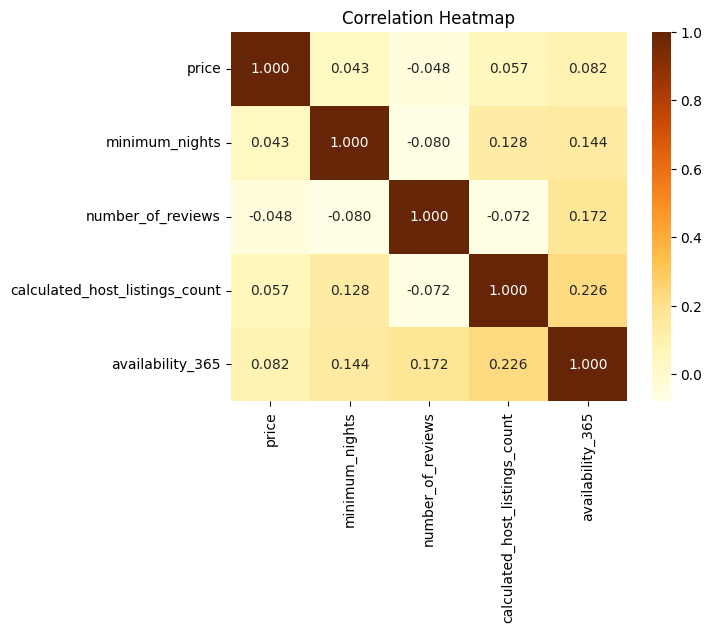

In [ ]:
numerical_columns = df_airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]


correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
image=Image.open("New_York_City.png")

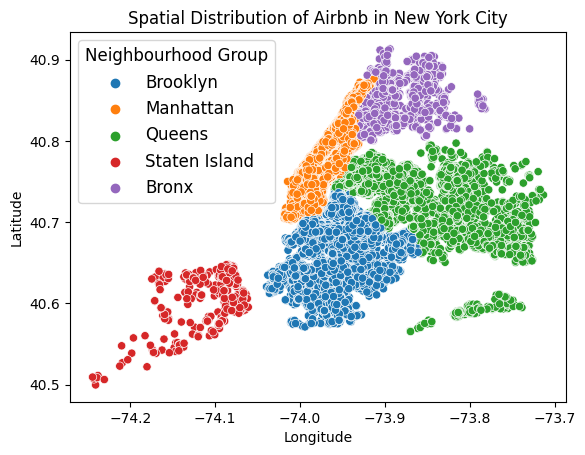

AttributeError: ignored

In [ ]:
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df_airbnb)

plt.title('Spatial Distribution of Airbnb in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', title_fontsize='large', fontsize='large')
plt.show()
plt.extend()

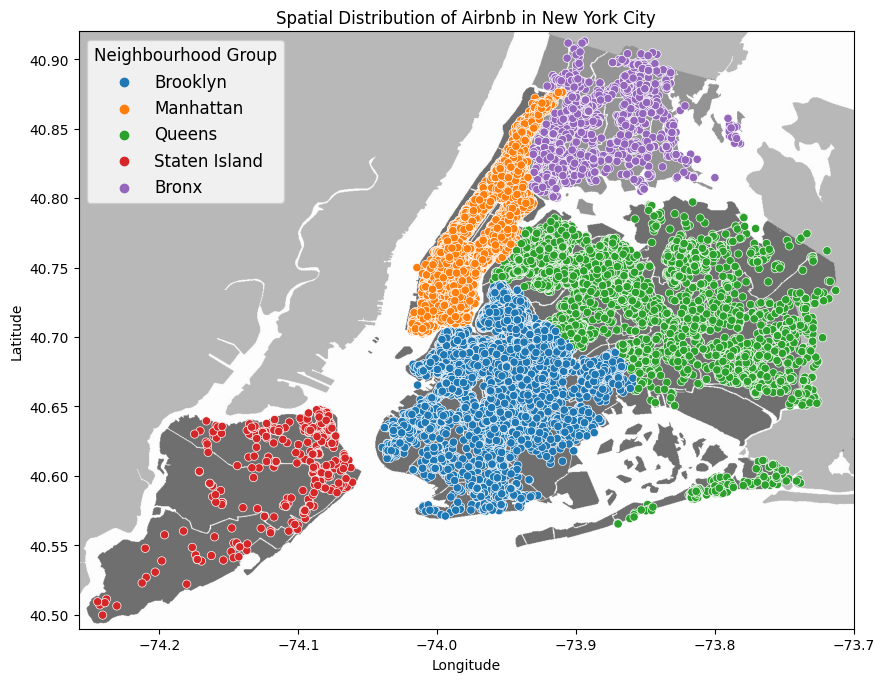

In [ ]:
plt.figure(figsize=(10, 8))

plt.imshow(image, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])

sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df_airbnb)

plt.title('Spatial Distribution of Airbnb in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', title_fontsize='large', fontsize='large')
plt.show()

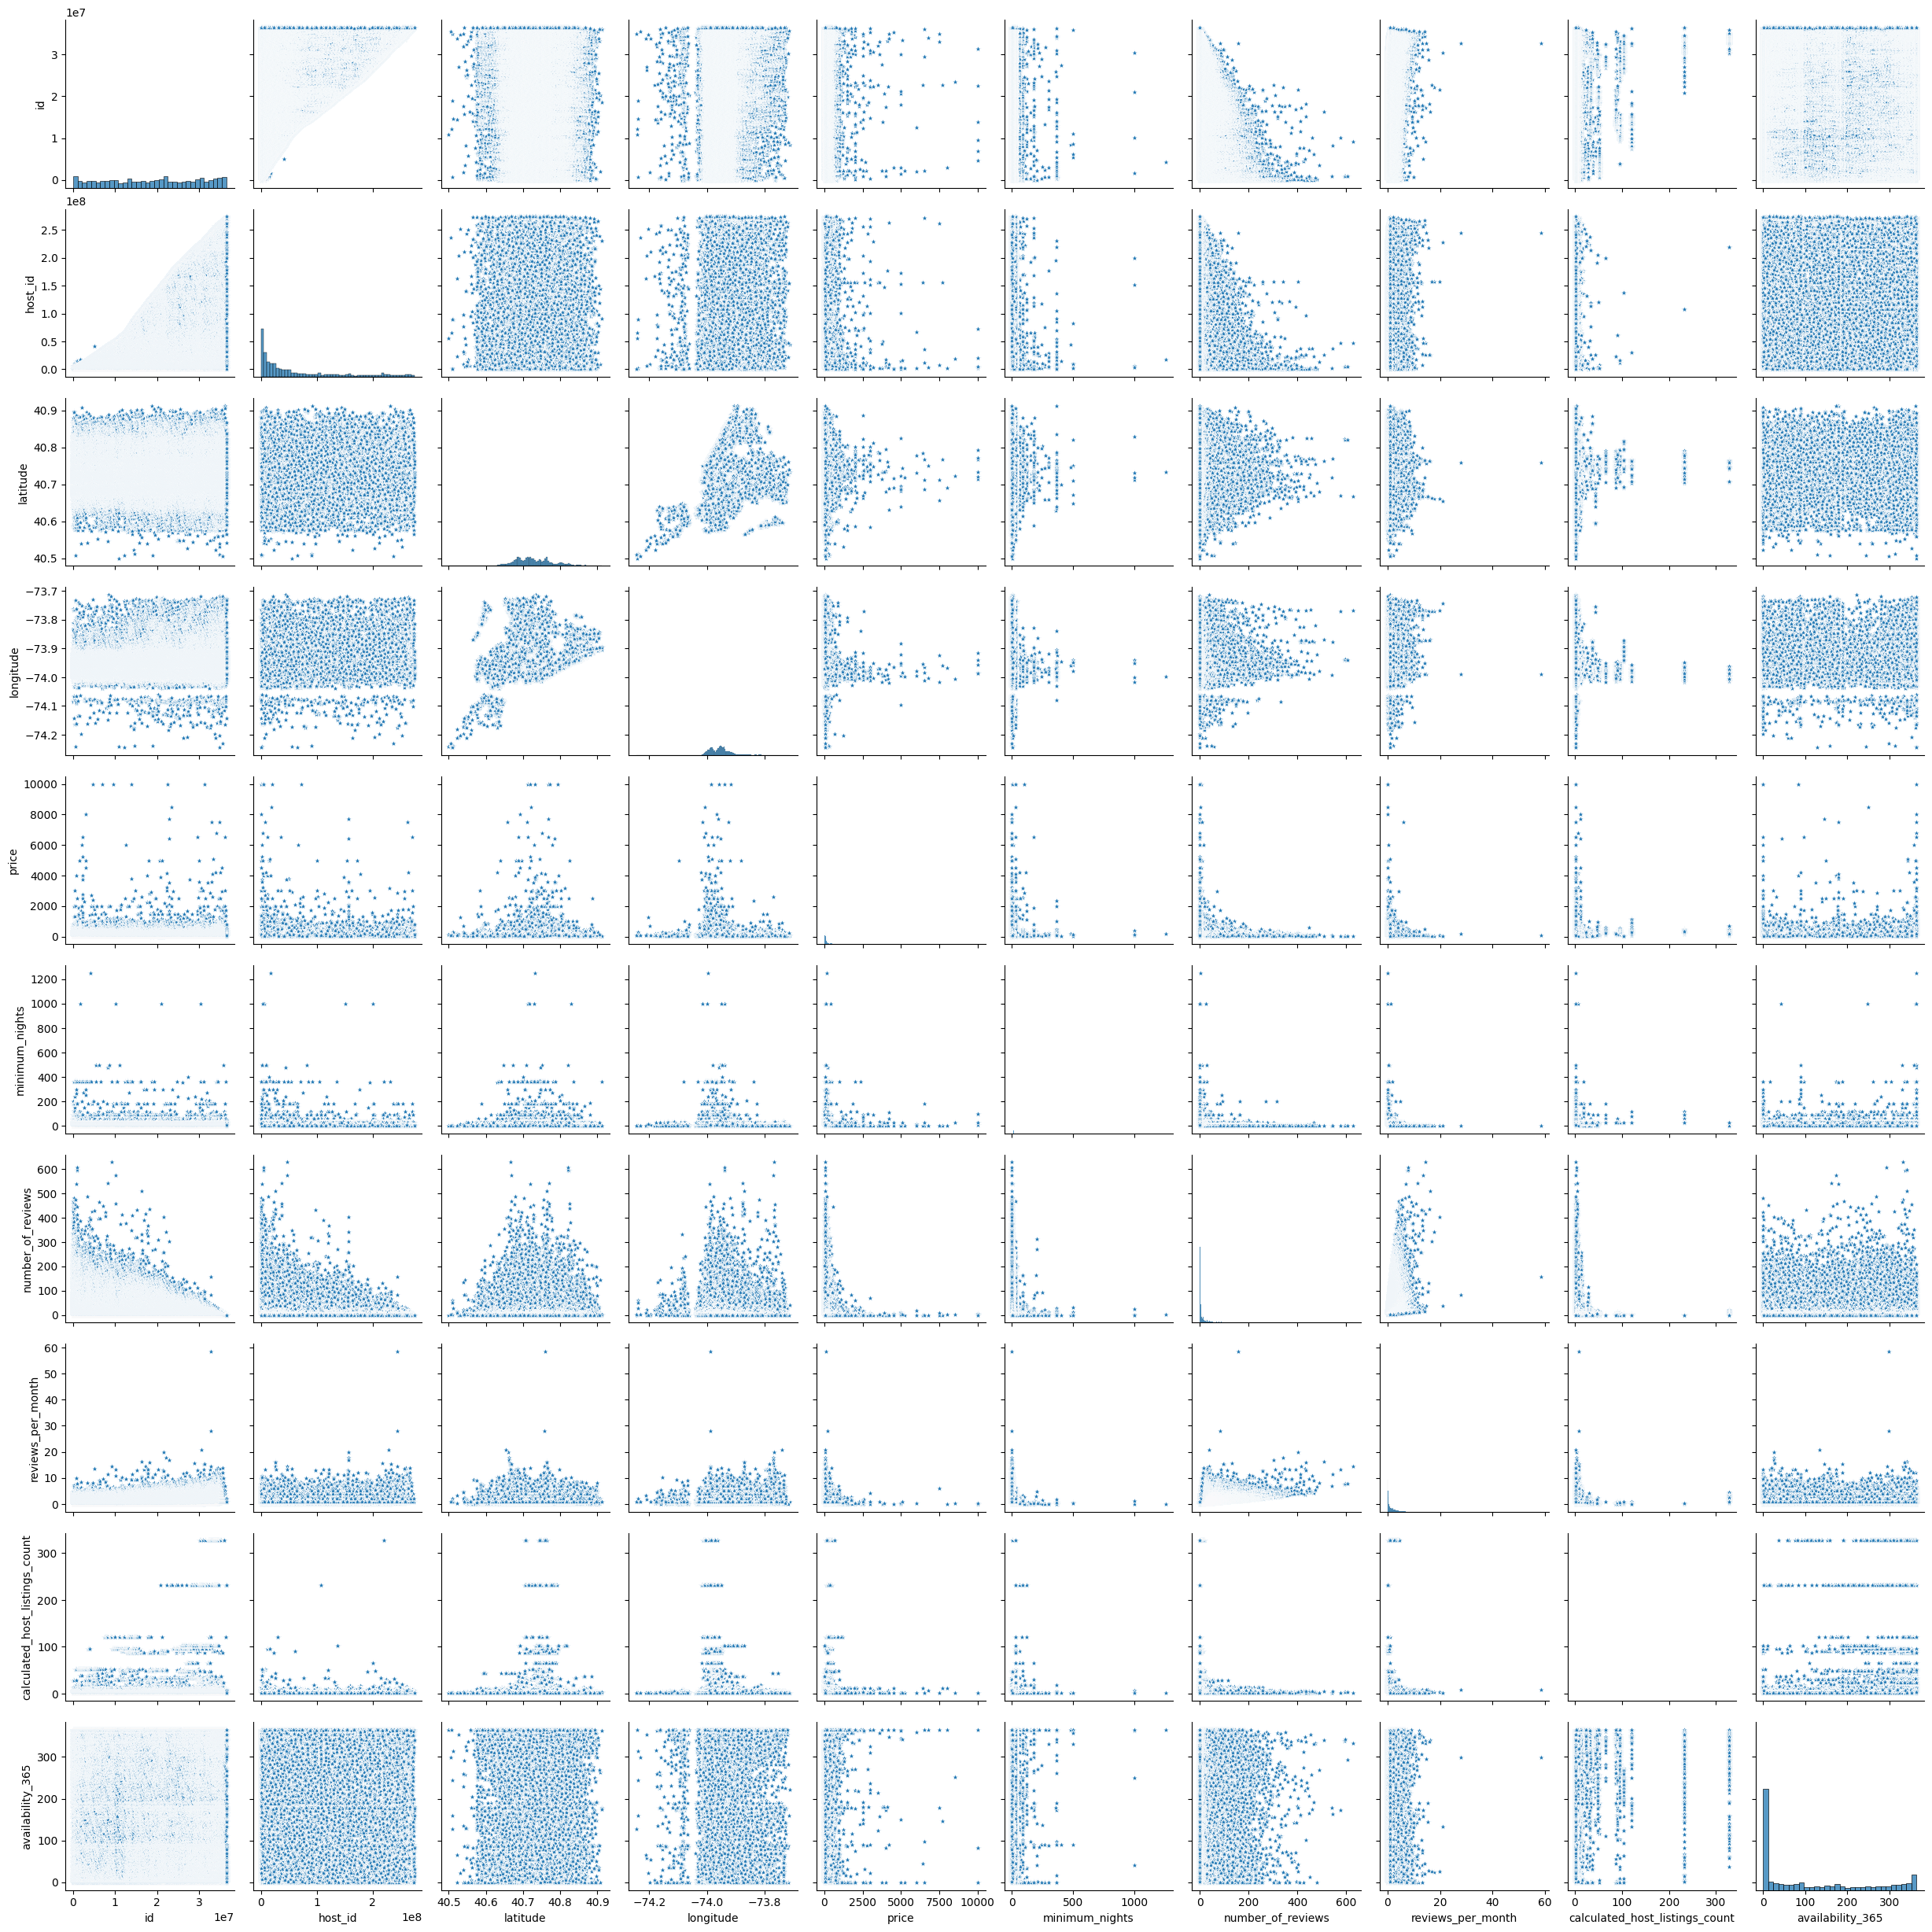

In [ ]:
sns.pairplot(data=df_airbnb,markers='*')